# MA934 Problem Sheet 2

I do apologise for the style not being 100% consistent, I learnt new functionality as I went along. For example, after discovering that you can't do powers using ```x^y``` I figured you had to use ```pow()``` or the preferable (purely because it seems numpy is always preferable) ```np.power()```. Then I was told that you can just do ```x**y``` and so ¯\_(ツ)_/¯. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import timeit

## Task 1 - Insertion Sort (test insert too)

To begin I shall provide an implementation of shell sort, both because I coded it up last week and would hate for it to go to waste and because (of course) insertion sort is a specific case of shell sort. For this implementation we use the suggested sequence $$Q = \lbrace \left(3^i-1\right)/2 : i=i_{max}, i_{max}-1, \dots, 2, 1 \rbrace .$$
To do insert sort _if you must_ we provide an optional parameter; set ```insert = "yes"``` to overwrite $Q$ and set it equal to $\lbrace 1\rbrace$. To print the $Q$ values use the optional parameter ```printQs = "yes"```.
This function takes as input an (unsorted) numpy array, $l$, of real numbers (represented by integers or floats) and outputs the sorted list. It sorts list of size $2^{16}$ in roughly 10s, or of size $2^{12}$ in comparable time doing insertion sort. It is worth noting that this function overwrites the input as it goes.

In [105]:
def shellsort(l,insert = "no",printQs = "yes"):

    n = len(l)
    
    if insert == "yes":
        Qs = np.array([1])
    else:
        # First we calculate i_max
        iimax = np.floor(np.log(n-1)/np.log(3)).astype(int)
        # Then we generate the linear sequence from i_max to 1
        iis = np.linspace(1,iimax,iimax)
        iis = np.flip(iis).astype(int)
        # Then we generate (and print) the sequence of Q values that we will use
        Qs = (0.5*(np.power(3,iis)-1)).astype(int)
    if printQs == "yes":
        print("Q values", Qs) # Feel free to toggle this off! 

    for q in Qs: # Going through the levels of refinery
        for m in range(q): # And the respective subsequences
            for k in range(np.floor(n/q).astype(int)): # The indicies of 
                # the subsequence in question
                for j in range(k): # To compare to the already sorted
                    if l[q*(k-j)-m]>=l[q*(k-j-1)-m]:
                        break # break if we are greater than OR equal to the
                        # next sorted element
                    else:
                        l[[q*(k-j)-m, q*(k-j-1)-m]]=l[[q*(k-j-1)-m, q*(k-j)-m]]
                        # otherwise switch round the two elements and continue
                        # to compare                
                    
    return(l)

### Now to test this algorithm on some lists

To begin, a random one that takes real values both positive and negative. We will depict the sorted list in a plot and compare it to another such depiction using the inbuilt ```numpy.sort()``` functionality. 

Q values [1093  364  121   40   13    4    1]


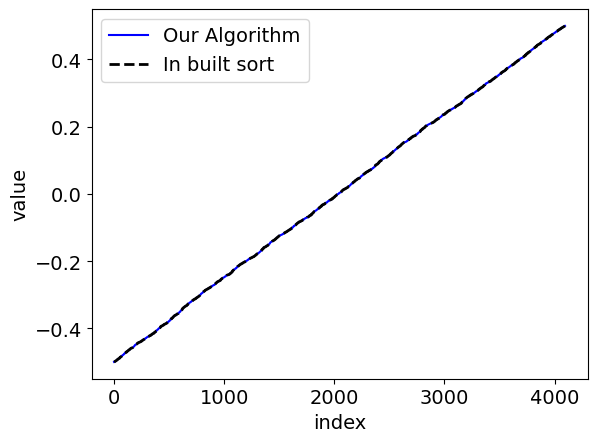

In [106]:
l = np.random.rand(np.power(2,11))-0.5

theirsort = np.sort(l)
shellsort(l)

plt.rcParams.update({'font.size': 14})

plt.plot(l, "b-", linewidth = 1.5, label=r"Our Algorithm")
plt.plot(theirsort, "k--", linewidth=2.0, label=r"In built sort")
plt.legend(loc="upper left")

plt.xlabel(r"index")
plt.ylabel(r"value")
plt.show()


And we will repeat the process explicitly for insertion sort. 

Q values [1]


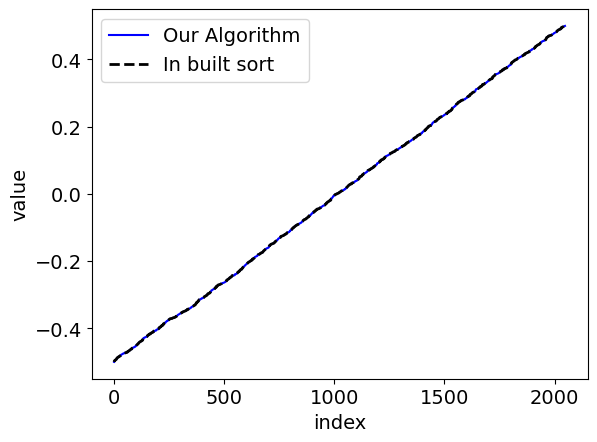

In [110]:
l = np.random.rand(np.power(2,11))-0.5

theirsort = np.sort(l)
shellsort(l,insert = "yes")

plt.rcParams.update({'font.size': 14})

plt.plot(l, "b-", linewidth = 1.5, label=r"Our Algorithm")
plt.plot(theirsort, "k--", linewidth=2.0, label=r"In built sort")
plt.legend(loc="upper left")

plt.xlabel(r"index")
plt.ylabel(r"value")
plt.show()


It appears our sort is performing well! Now for some "tricky" scenarios

In [111]:
# All zeros
l = np.zeros(10)
shellsort(l)

Q values [4 1]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [112]:
# Already in order
l = np.linspace(0,12,13)
shellsort(l)

Q values [4 1]


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [113]:
# Worst case scenario
l = np.linspace(0,12,13)
l = np.flip(l)
shellsort(l)

Q values [4 1]


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

## Task 2 - Mergesort

This feels like plagiarism, but equally it is what you've asked us to do so- voila, your mergesort algorithm (I'll comment it just in case). This runs on the python list thingys as opposed to the numpy arrays.

In [114]:
def interlace(list1, list2):
    # initialise the interlaced list
    alist = []
    # base cases
    if (len(list1) == 0): 
        return list2
    elif (len(list2) == 0):
        return list1
    # recursive steps, add the lower elt to alist
    elif list1[0] < list2[0]:
        alist.append(list1[0]) 
        return alist + interlace(list1[1:], list2)
    else:
        alist.append(list2[0])
        return alist + interlace(list1, list2[1:])

In [115]:
def mergeSort(A):
    n=len(A)
    if n == 1:
        return A # an array of length 1 is already sorted
    else:
        m=n//2
    return interlace(mergeSort(A[0:m]), mergeSort(A[m:n]))

### Now to test it

Simple random case

In [116]:
A = random.sample(range(1,200),10)
mergeSort(A)

[10, 38, 50, 57, 64, 86, 134, 148, 159, 182]

Now with replacement and negative numbers 

In [117]:
A = random.choices(range(-5,5), weights=None, cum_weights=None, k=20)
mergeSort(A)

[-5, -4, -4, -4, -4, -2, -2, -2, -2, -2, -1, -1, -1, -1, 0, 0, 2, 3, 3, 3]

Big random case

In [118]:
A = random.sample(range(1,np.power(2,14)),np.power(2,13))
try:
    mergeSort(A)
except RecursionError:
    print("\x1b[31m RECURSION ERROR! \x1b[0m")

 RECURSION ERROR! 


Uh oh, maximum recursion depth exceeded, that won't do.

## Task 3 - Fixing Mergesort (test on non int)

The first step is going to be to adapt the code to run on numpy arrays since apparently (source: Oscar)* these are faster than python lists (and also for fair comparison to the shell/insertion sort algorithm). The new interlace (now ```merge()```) algorithm takes as inputs two sorted numpy arrays of real numbers represented by floats or integers and outputs their merged array. The mergesort algorithm is essentially exactly the same, but we rewrite it here anyways, this time with $l$ as the argument (for consistency) and make use of a lowercase "s" in the name to distinguish ```mergeSort``` from ```mergesort``` (not confusing at all, I'm sure). It sorts arrays of size $2^{17}$ in roughly 15s.

*_is it possible that I completely missed the nuance of the argument and am instead misquoting him with a broad sweeping statement? Perhaps._

In [119]:
def merge(l1,l2): # The new and improved interlace function
    
    # For ease of implementation we want l2 to contain our largest element
    if np.max(l1)>np.max(l2):
        l1, l2 = l2, l1

    # We initialise alist for speed
    alist = np.zeros(len(l1)+len(l2))
    # We will use a counter to keep track of what index of alist to assign to
    C = 0
    # It will be easier if we can rewrite the already assigned elements of l1
    # to be larger than the biggest element in l2 so they do not get reassigned
    big = np.max(l2) + 1

    for k in l2:
        # We introduce a new temporary counter for the number of elements of l1
        # less than or equal to the current element of l2, this is where 
        # rewriting l1 using'big' helps
        c = np.sum(l1<=k)
        # if c>0 we assign those elements to alist
        if c>0:
            alist[C:C+c] = l1[l1<=k]
            l1[l1<=k] = big
        # We update C
        C = C + c
        # We add the element of l2
        alist[C] = k
        # And update C again
        C = C + 1

    return alist

In [120]:
def mergesort(l): # The new and improved merge sort (notice lowercase s)
    n=len(l)
    if n == 1:
        return l # an array of length 1 is already sorted
    else:
        m=n//2
    return merge(mergesort(l[0:m]), mergesort(l[m:n]))

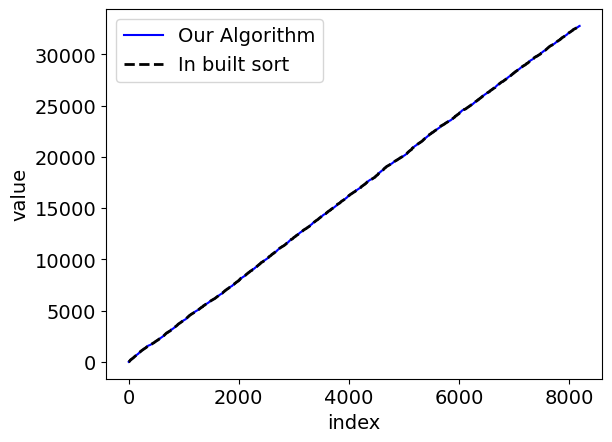

In [121]:
l = np.random.randint(np.power(2,15),size = (np.power(2,13)))

theirsort = np.sort(l)
oursort = mergesort(l)

plt.rcParams.update({'font.size': 14})

plt.plot(oursort, "b-", linewidth = 1.5, label=r"Our Algorithm")
plt.plot(theirsort, "k--", linewidth=2.0, label=r"In built sort")
plt.legend(loc="upper left")

plt.xlabel(r"index")
plt.ylabel(r"value")
plt.show()


Perhaps we want to check that it also works on lists that are not of a length that is divisible by 2 and so on.

In [122]:
l = np.random.rand(17)-0.5 # floats, negatives
print(mergesort(l))
l = np.random.randint(10,size=(20)) # repeats
print(mergesort(l))

[-0.49194255 -0.4913204  -0.47210151 -0.31556364 -0.23521261 -0.23463508
 -0.03382004  0.19095662  0.23892163  0.24820546  0.28366139  0.29175372
  0.32993184  0.37938008  0.39250244  0.42406005  0.4964632 ]
[0. 0. 0. 1. 1. 2. 2. 3. 4. 4. 4. 4. 4. 6. 7. 8. 9. 9. 9. 9.]


Fantastic

## Task 4 - Runtime

We will now sort lists of random integers of exponentially increasing lengths using each of our implemented functions (insertion, shell and mergesort), average the times over 5 trials and save the results to a file (to be loaded again). We try to load the file and run the trials if we fail to do so. 

In [152]:
try:
    thetimes = np.genfromtxt('Tms.csv', delimiter=',')
    pows = len(thetimes)+2
    discount = 4 # please manually make sure this matches the one below
except OSError:

    pows = 18
    discount = 4 # Simply cannot do as many insertion sorts

    Tms = np.zeros((pows-2,3))
    for szs in range(2,pows):
        print(szs)
        for trials in range(5):
            l = np.random.randint(np.power(2,szs),size=(np.power(2,szs),1))
            Tms[szs-2,1] = timeit.timeit('shellsort(l,insert = "no",printQs = "no")',
                                         globals=globals(), number=1) + Tms[szs-2,1]        
            l = np.random.randint(np.power(2,szs),size=(np.power(2,szs),1))
            Tms[szs-2,2] = timeit.timeit('mergesort(l)',
                                         globals=globals(), number=1) + Tms[szs-2,2]
    print("Now insertion sort")
    for szs in range(2,pows-discount):
        print(szs)
        for trials in range(5):
            l = np.random.randint(np.power(2,szs),size=(np.power(2,szs),1))
            Tms[szs-2,0] = timeit.timeit('shellsort(l,insert = "yes",printQs = "no")',
                                         globals=globals(),number=1) + Tms[szs-2,0] 
            

    Tms = Tms/5
    print(Tms)

    np.savetxt("Tms.csv", Tms, delimiter=",") #, fmt="%f"
    thetimes = np.genfromtxt('Tms.csv', delimiter=',')
print(thetimes)

[[1.10709801e-04 2.30987795e-04 2.37336801e-04]
 [3.73183592e-04 3.58695199e-04 5.20392600e-04]
 [8.37531197e-04 1.31981381e-03 1.09403839e-03]
 [3.31673800e-03 3.45790900e-03 2.38365200e-03]
 [1.32011078e-02 1.01622874e-02 5.49610220e-03]
 [5.25911010e-02 2.33075808e-02 1.04632824e-02]
 [2.12350133e-01 5.99283240e-02 2.29733696e-02]
 [8.32426439e-01 1.43620132e-01 5.15429382e-02]
 [3.45491241e+00 3.15263245e-01 1.02418138e-01]
 [1.36842756e+01 7.10411299e-01 2.18315216e-01]
 [5.50124652e+01 1.59079742e+00 4.82862693e-01]
 [2.23330607e+02 4.05761971e+00 1.15996405e+00]
 [0.00000000e+00 8.86538270e+00 2.59302726e+00]
 [0.00000000e+00 2.03812504e+01 6.34069138e+00]
 [0.00000000e+00 4.56642424e+01 1.62613091e+01]
 [0.00000000e+00 1.04172894e+02 4.69549959e+01]]


### Plotting

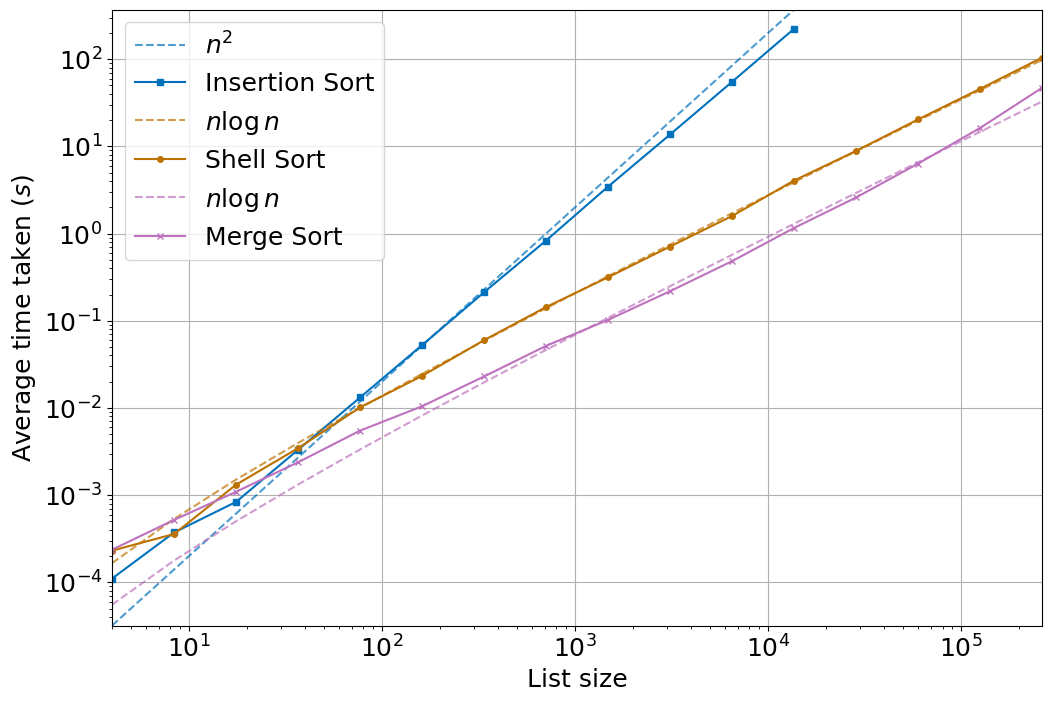

In [155]:
pts = np.linspace(2,pows,pows-2)
pts = np.power(2,pts)
nlogns = 0.00003*pts*np.log(pts)
# n54 = 0.00005*np.power(pts,1.25)
nlognm = 0.00001*pts*np.log(pts)
n2 = 0.000002*pts*pts

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(12, 8))


plt.loglog(pts[:-discount],n2[:-discount],"--",label=r"$n^2$",color = (0, 0.447, 0.741, 1),alpha=0.7)
plt.loglog(pts[:-discount],thetimes[:-discount,0],"-s",markersize=4,label=r"Insertion Sort",color = (0, 0.447, 0.741, 1))
plt.loglog(pts,nlogns,"--",label=r"$n\log n$",color = (0.741, 0.447, 0, 1),alpha=0.7)
plt.loglog(pts,thetimes[:,1],"-o",markersize=4,label=r"Shell Sort",color = (0.741, 0.447, 0, 1))
plt.loglog(pts,nlognm,"--",label=r"$n\log n$",color = (0.741, 0.447, 0.741, 1),alpha=0.7)
plt.loglog(pts,thetimes[:,2],"-x",markersize=4,label=r"Merge Sort",color = (0.741, 0.447, 0.741, 1))


plt.legend(loc="upper left")

plt.xlabel(r"List size")
plt.ylabel(r"Average time taken $(s)$")
plt.xlim([4, 2**18])
plt.ylim([0.000002*pts[0]*pts[0], 0.000002*pts[-1-discount]*pts[-1-discount]])
plt.grid()
plt.show()